### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
from plotly.offline import iplot,plot
import cufflinks as cf
import seaborn as sns

init_notebook_mode(connected=True)
cf.go_offline()

### Reading the Dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Plotting all the columns

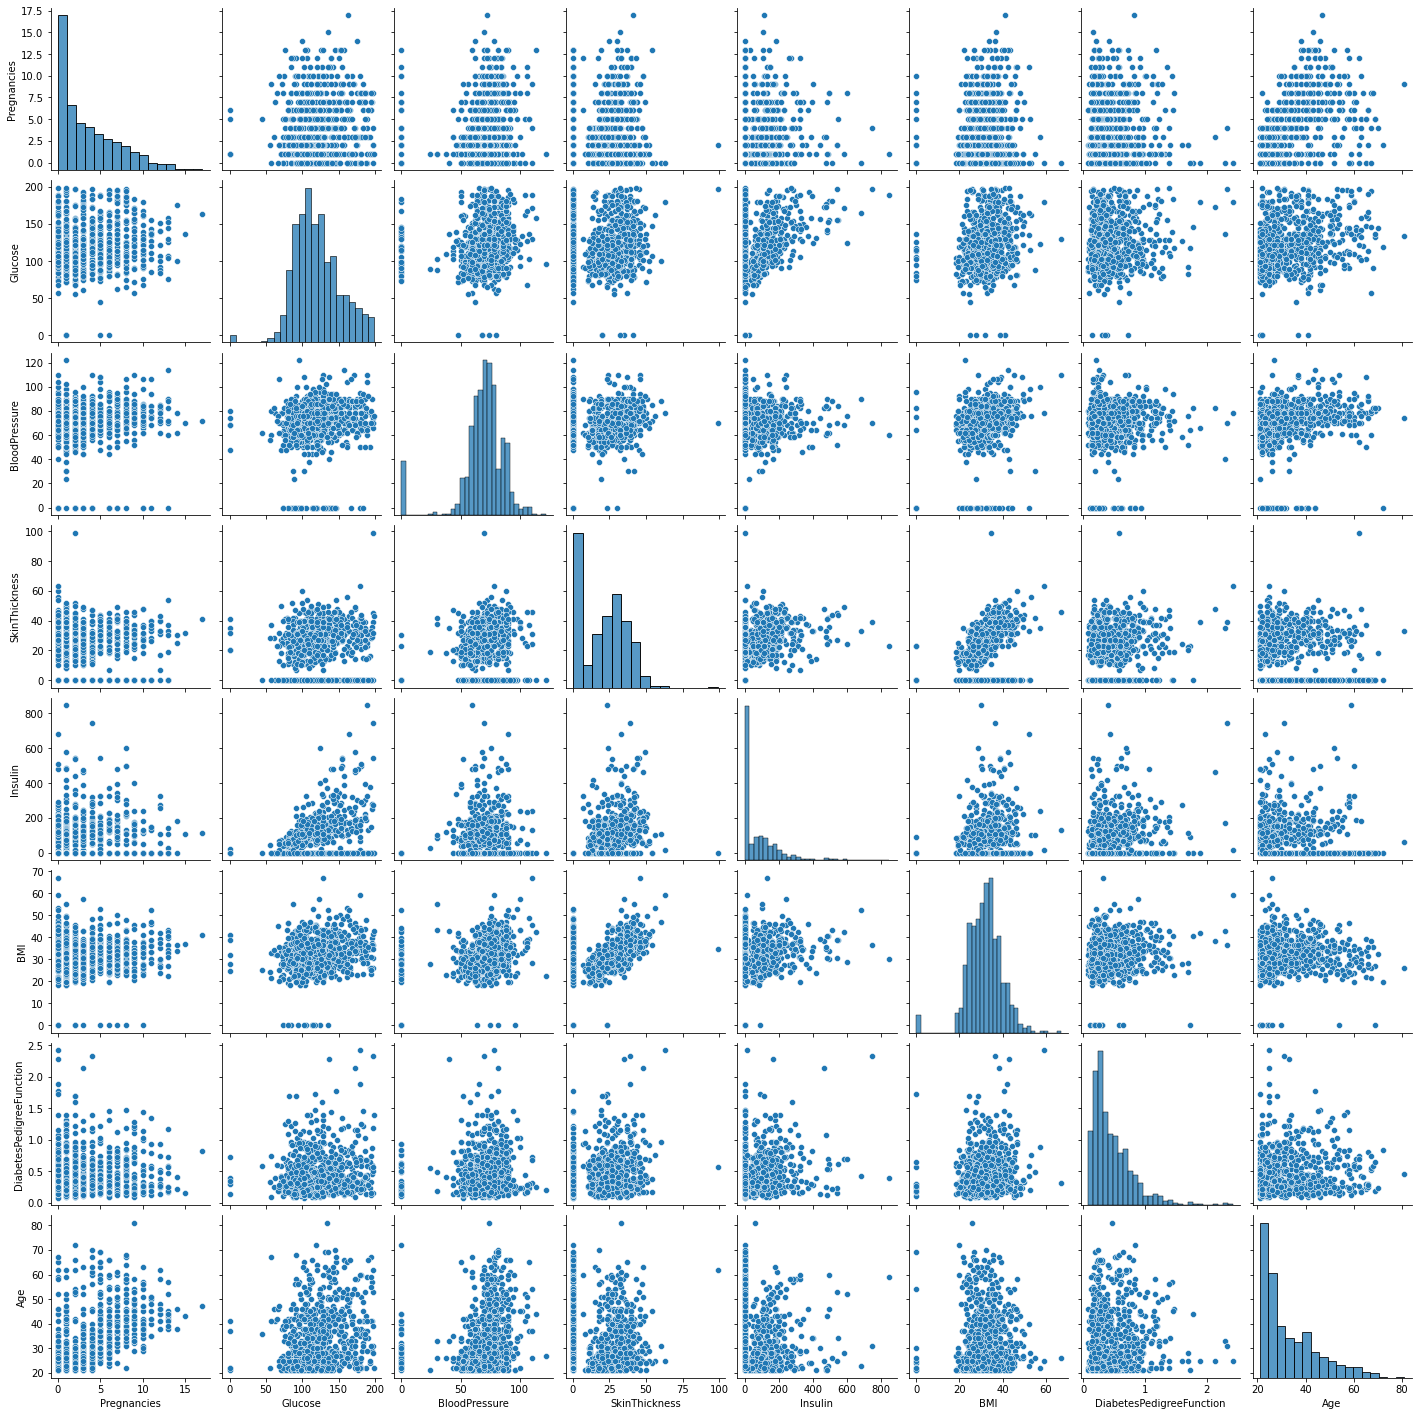

In [4]:
sns.pairplot(data=df.drop('Outcome',axis=1))

### Getting the Outcome values of the Dataset

In [5]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

### Importing the Calssification Libraries

In [6]:
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, confusion_matrix

In [7]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Decision Tree

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [11]:
predDtree = dtree.predict(X_test)

In [12]:
dtree_CR = classification_report(y_test,predDtree)
dtree_CM = confusion_matrix(y_test,predDtree)

In [13]:
accDtree = dtree.score(X_test,y_test)

In [14]:
print("\nTest Accuracy for Decision Tree: {0:f}%\n".format(accDtree*100))
print("Confusion Matrix for Decision Tree")
print(dtree_CM)
print()
print("Classification Report for Decision Tree")
print(dtree_CR)



Test Accuracy for Decision Tree: 70.995671%

Confusion Matrix for Decision Tree
[[113  38]
 [ 29  51]]

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       0.80      0.75      0.77       151
           1       0.57      0.64      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.69       231
weighted avg       0.72      0.71      0.71       231



### Random Forest

In [15]:
rfc = RandomForestClassifier(n_estimators=200)

In [16]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200)

In [17]:
predRfc = rfc.predict(X_test)

In [18]:
rfc_CR = classification_report(y_test,predRfc)
rfc_CM = confusion_matrix(y_test,predRfc)
accRfc = rfc.score(X_test,y_test)

In [19]:
print("\nTest Accuracy for Decision Tree: {0:f}%\n".format(accRfc*100))
print("Confusion Matrix for Random Forest")
print(rfc_CM)
print()
print("Classification Report for Random Forest")
print(rfc_CR)



Test Accuracy for Decision Tree: 73.160173%

Confusion Matrix for Random Forest
[[119  32]
 [ 30  50]]

Classification Report for Random Forest
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       151
           1       0.61      0.62      0.62        80

    accuracy                           0.73       231
   macro avg       0.70      0.71      0.71       231
weighted avg       0.73      0.73      0.73       231



### K-Nearest Neighbor

In [20]:
knn = KNeighborsClassifier(n_neighbors = 25)

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=25)

In [22]:
predKnn = knn.predict(X_test) 

In [23]:
knn_CR = classification_report(y_test,predKnn)
knn_CM = confusion_matrix(y_test,predKnn)
accKnn = rfc.score(X_test,y_test)

In [24]:
print("\nTest Accuracy for Decision Tree: {0:f}%\n".format(accKnn*100))
print("Confusion Matrix for K-Nearest Neighbor")
print(knn_CM)
print()
print("Classification Report for K-Nearest Neighbor")
print(knn_CR)



Test Accuracy for Decision Tree: 73.160173%

Confusion Matrix for K-Nearest Neighbor
[[131  20]
 [ 41  39]]

Classification Report for K-Nearest Neighbor
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       151
           1       0.66      0.49      0.56        80

    accuracy                           0.74       231
   macro avg       0.71      0.68      0.69       231
weighted avg       0.73      0.74      0.72       231



### Comparision

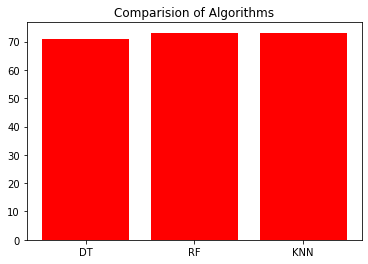

In [25]:
objects = ('DT','RF','KNN')
y_pos = np.arange(len(objects))
performance = [accDtree*100,accRfc*100,accKnn*100]

plt.bar(y_pos, performance, align='center', color = 'red')
plt.xticks(y_pos, objects)
plt.title('Comparision of Algorithms')

plt.show()